**Importing our dataset**


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ItDhaS75ndHKofb5G3oJ")
project = rf.workspace("new-workspace-wfzw3").project("grocery-dataset-q9fj2")
version = project.version(5)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Grocery-Dataset-5 in yolov8:: 100%|██████████| 67850/67850 [00:11<00:00, 5962.44it/s]


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**Training our model**

In [ ]:
from ultralytics import YOLO


model = YOLO("yolov8n.pt")

# Train the model using refined parameters:
results = model.train(
    data="/content/Grocery-Dataset-5/data.yaml",
    epochs=9,                   # Increase epochs for better convergence (adjust as needed)
    batch=16,                    # Adjust batch size based on your GPU memory (e.g. 8, 16, or 32)
    imgsz=640,                   # Standard image size; 640 often gives a good balance between speed and accuracy
    device=0,
    name="product_detection_best",  # Name of this training run
    project="runs/detect",       # Folder to save training results
    exist_ok=True,               # Overwrite existing run with the same name if needed
    augment=True                # Enable data augmentation during training
)

# Optionally, view or print results
print(results)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 122MB/s]


Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Grocery-Dataset-5/data.yaml, epochs=9, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/detect, name=product_detection_best, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]


Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 86.7MB/s]


AMP: checks passed ✅


train: Scanning /content/Grocery-Dataset-5/train/labels... 29673 images, 6 backgrounds, 0 corrupt: 100%|██████████| 29673/29673 [00:42<00:00, 704.80it/s]


train: New cache created: /content/Grocery-Dataset-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Grocery-Dataset-5/valid/labels... 2815 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2815/2815 [00:05<00:00, 549.80it/s]


val: New cache created: /content/Grocery-Dataset-5/valid/labels.cache
Plotting labels to runs/detect/product_detection_best/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/product_detection_best
Starting training for 9 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/9      2.28G     0.9575      2.472      1.385         15        640: 100%|██████████| 1855/1855 [10:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:28<00:00,  3.06it/s]

                   all       2815       2816      0.979      0.988      0.992      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/9      2.23G     0.8833       1.13      1.281         23        640: 100%|██████████| 1855/1855 [10:06<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:25<00:00,  3.39it/s]

                   all       2815       2816      0.992      0.992      0.995      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/9      2.23G     0.8532     0.8717      1.253         23        640: 100%|██████████| 1855/1855 [09:51<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:30<00:00,  2.85it/s]

                   all       2815       2816      0.992      0.991      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/9      2.24G     0.8077     0.7352      1.224         24        640: 100%|██████████| 1855/1855 [09:40<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:26<00:00,  3.26it/s]

                   all       2815       2816      0.996      0.996      0.994      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/9      2.24G     0.7573     0.6441      1.191         21        640: 100%|██████████| 1855/1855 [09:35<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:27<00:00,  3.22it/s]

                   all       2815       2816      0.998      0.997      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/9      2.23G      0.719     0.5793      1.171         19        640: 100%|██████████| 1855/1855 [09:30<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:25<00:00,  3.41it/s]

                   all       2815       2816      0.998      0.996      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/9      2.23G     0.6856     0.5362      1.149         23        640: 100%|██████████| 1855/1855 [09:29<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:29<00:00,  2.95it/s]

                   all       2815       2816      0.998      0.998      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        8/9      2.23G     0.6642     0.5021      1.135         20        640: 100%|██████████| 1855/1855 [09:29<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:28<00:00,  3.06it/s]

                   all       2815       2816      0.998      0.998      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        9/9      2.24G     0.6331      0.469      1.118         23        640: 100%|██████████| 1855/1855 [09:28<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:25<00:00,  3.47it/s]

                   all       2815       2816      0.998      0.998      0.995      0.887



9 epochs completed in 1.533 hours.
Optimizer stripped from runs/detect/product_detection_best/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/product_detection_best/weights/best.pt, 6.3MB

Validating runs/detect/product_detection_best/weights/best.pt...
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:39<00:00,  2.25it/s]


                   all       2815       2816      0.999      0.998      0.995      0.899
Bisconni Chocolate Chip Cookies 46.8gm        118        118      0.999          1      0.995      0.921
   Coca Cola Can 250ml        120        121      0.999      0.992      0.995      0.909
Colgate Maximum Cavity Protection 75gm        130        130      0.999          1      0.995      0.891
           Fanta 500ml        117        117      0.999          1      0.995      0.916
Fresher Guava Nectar 500ml         94         94      0.999          1      0.995      0.919
Fruita Vitals Red Grapes 200ml         95         95      0.999          1      0.995      0.951
   Islamabad Tea 238gm        103        103      0.999          1      0.995      0.895
Kolson Slanty Jalapeno 18gm        127        127      0.999          1      0.995      0.854
Kurkure Chutney Chaska 62gm        115        115      0.999          1      0.995      0.927
 LU Candi Biscuit 60gm        120        120          1 

**Load different parameters F1-score,etc...**

In [ ]:
from ultralytics import YOLO

# Load your custom YOLOv8 model weights
model = YOLO("best.pt")  # Replace with your custom weights file

results = model.val(data="/content/Grocery-Dataset-5/data.yaml", conf=0.5, iou=0.5, save=True)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 20.7MB/s]
val: Scanning /content/Grocery-Dataset-5/valid/labels... 2815 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2815/2815 [00:04<00:00, 624.03it/s]


val: New cache created: /content/Grocery-Dataset-5/valid/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 176/176 [00:28<00:00,  6.09it/s]


                   all       2815       2816          1      0.998      0.995      0.898
Bisconni Chocolate Chip Cookies 46.8gm        118        118          1          1      0.995      0.917
   Coca Cola Can 250ml        120        121          1      0.992      0.995      0.897
Colgate Maximum Cavity Protection 75gm        130        130          1          1      0.995      0.898
           Fanta 500ml        117        117          1          1      0.995      0.933
Fresher Guava Nectar 500ml         94         94          1          1      0.995       0.92
Fruita Vitals Red Grapes 200ml         95         95          1          1      0.995      0.953
   Islamabad Tea 238gm        103        103          1          1      0.995      0.895
Kolson Slanty Jalapeno 18gm        127        127          1          1      0.995      0.866
Kurkure Chutney Chaska 62gm        115        115          1          1      0.995      0.924
 LU Candi Biscuit 60gm        120        120          1 

**Detecting products on our images**

In [ ]:
import os

# Define the directory where your images are stored
image_dir = "/content/pictures"

# Define valid image file extensions
valid_extensions = ('.png', '.jpg', '.jpeg')

# Loop through all files in the directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith(valid_extensions):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)

        # Run inference on the image
        results = model.predict(image_path, imgsz=640, conf=0.5)

        # Display the results
        results[0].show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/pictures'

**Detecting can of Coke**

In [ ]:
from ultralytics import YOLO

model=YOLO("best.pt")

results = model.predict("coca-cola.jpg", imgsz=640, conf=0.25)

# Display the results
results[0].show()

**Webscrapping Images**

In [ ]:
!pip install icrawler

import os
from icrawler.builtin import GoogleImageCrawler

# Define a list of around 100 Algerian products (food, beverages, and traditional items)
algerian_products =[
    'Chocolate cookie algeria bimo cookies',
    'Colgate 75g (blue) or any toothpast',
    'hamoud boualem cola',
    'Juice bottle 500ml Ifruit',
    'Juice box 200ml daily',
    'Juice box 200ml Rouiba',
    'شاي الراقي',
    'Chips Mahboul',
    'Chips Master chips',
    'Soap bar Dove',
    'Biscuit half roll cherchel',
    'Biscuit half roll Tango',
    'Venus Shampoo',
]

def download_images_for_product(product, max_num=1):
    """
    Downloads images for a given product keyword using GoogleImageCrawler.
    Each product’s images are saved in a dedicated folder.
    """
    # Create a safe folder name by replacing spaces with underscores
    folder_name = product.replace(" ", "_")
    output_dir = os.path.join("downloads", folder_name)
    os.makedirs(output_dir, exist_ok=True)

    # Initialize the Google image crawler with the specified storage path
    crawler = GoogleImageCrawler(storage={"root_dir": output_dir})

    # Start the crawl for the given product keyword
    crawler.crawl(keyword=product, max_num=max_num)

if __name__ == "__main__":
    # Loop over the list and download images for each product.
    # Change max_num to download more than one image per product if desired.
    for product in algerian_products:
        print(f"Downloading images for: {product}")
        try:
            download_images_for_product(product, max_num=25)
        except Exception as e:
            print(f"An error occurred while downloading images for {product}: {e}")



ERROR:downloader:Response status code 403, file https://i.redd.it/i-started-a-small-business-updated-update-v0-ya2vgyw4glnb1.jpg
ERROR:downloader:Response status code 403, file https://i.redd.it/i-started-a-small-business-v0-wlv5jenbhbjb1.jpg


ERROR:downloader:Response status code 403, file https://www.colgate.com.au/content/dam/cp-sites/oral-care/oral-care-center/en-au/product-detail-pages/toothpaste/colgate-kids-bluey-mint-gel-toothpaste-thumb-1.jpg


ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Hamoud_boualem_%286337594964%29.jpg


ERROR:downloader:Response status code 429, file https://tecchemicals.com/wp-content/uploads/2022/11/Juice-Bottles-Black-Top_73.jpg
ERROR:downloader:Response status code 429, file https://tecchemicals.com/wp-content/uploads/2022/04/Juice-Bottles-Black-Top24.jpg
ERROR:downloader:Response status code 429, file https://tecchemicals.com/wp-content/uploads/2022/04/Juice-Bottles-Black-Top25.jpg
ERROR:downloader:Response status code 429, file https://tecchemicals.com/wp-content/uploads/2022/04/Juice-Bottles-Black-Top23.jpg
ERROR:downloader:Response status code 429, file https://tecchemicals.com/wp-content/uploads/2022/04/Juice-Bottles-Black-Top34-600x600.jpg
ERROR:downloader:Response status code 400, file https://ip.prod.freshop.retail.ncrcloud.com/resize?url=https://images.freshop.ncrcloud.com/00786162003553/6647aff2e3f40c1baf35fdd56fa62e19_large.png


ERROR:downloader:Response status code 400, file https://ip.prod.freshop.retail.ncrcloud.com/resize?url=https://images.freshop.ncrcloud.com/00889497852367/f47dbfa3e3739d4cb49b1342f0a72744_large.png


ERROR:downloader:Response status code 403, file https://preview.redd.it/tried-masters-black-truffles-chips-tastes-like-smelly-socks-v0-2onbzbqswz7b1.jpg
ERROR:downloader:Exception caught when downloading file https://cavuun.com/files/images/items/23/23756v7fb40549.jpg, error: HTTPSConnectionPool(host='cavuun.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://cavuun.com/files/images/items/23/23756v7fb40549.jpg, error: HTTPSConnectionPool(host='cavuun.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://cavuun.com/files/images/items/23/23756v7fb40549.jpg, error: HTTPSConnectionPool(host='cavuun.com', port=443): Read timed out. (read timeout=5), remaining retry times: 0


ERROR:downloader:Exception caught when downloading file https://www.meijer.com/content/dam/meijer/product/0011/11/1027/17/0011111027176_1_A1C1_0600.jpg, error: HTTPSConnectionPool(host='www.meijer.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.meijer.com/content/dam/meijer/product/0011/11/1027/17/0011111027176_1_A1C1_0600.jpg, error: HTTPSConnectionPool(host='www.meijer.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://www.meijer.com/content/dam/meijer/product/0011/11/1027/17/0011111027176_1_A1C1_0600.jpg, error: HTTPSConnectionPool(host='www.meijer.com', port=443): Read timed out. (read timeout=5), remaining retry times: 0
ERROR:downloader:Response status code 400, file https://ip.prod.freshop.retail.ncrcloud.com/resize?url=https://images.freshop.ncrcloud.com/00011111613287/b7d423b46c9182772d6be436870

ERROR:downloader:Response status code 400, file https://ip.prod.freshop.retail.ncrcloud.com/resize?url=https://images.freshop.ncrcloud.com/00694990083701/0ab3ff86b7e0ba2440e13414cefae4b1_large.png


ERROR:downloader:Exception caught when downloading file https://www.meijer.com/content/dam/meijer/product/0079/40/0516/11/0079400516114_1_A1C1_0600.jpg, error: HTTPSConnectionPool(host='www.meijer.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.meijer.com/content/dam/meijer/product/0079/40/0516/11/0079400516114_1_A1C1_0600.jpg, error: HTTPSConnectionPool(host='www.meijer.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://www.meijer.com/content/dam/meijer/product/0079/40/0516/11/0079400516114_1_A1C1_0600.jpg, error: HTTPSConnectionPool(host='www.meijer.com', port=443): Read timed out. (read timeout=5), remaining retry times: 0


**Loading Algerian Products Dataset**

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="dh2b3Jw3KiEM91BTCJTC")
project = rf.workspace("algerian-grocery-products").project("algerian-grocery-products")
version = project.version(9)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Algerian-grocery-products-9 in yolov8:: 100%|██████████| 1416/1416 [00:00<00:00, 6649.51it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Train on Our Dataset**

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

# Train the model using refined parameters:
results = model.train(
    data="/content/Algerian-grocery-products-9/data.yaml",
    epochs=100,                   # Increase epochs for better convergence (adjust as needed)
    batch=16,                    # Adjust batch size based on your GPU memory (e.g. 8, 16, or 32)
    imgsz=640,                   # Standard image size; 640 often gives a good balance between speed and accuracy
    device=0,
    name="product_detection_best",  # Name of this training run
    project="runs/detect",       # Folder to save training results
    exist_ok=True,
    augment=True,
)

# Optionally, view or print results
print(results)


100%|██████████| 6.25M/6.25M [00:00<00:00, 249MB/s]


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Algerian-grocery-products-9/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/detect, name=product_detection_best, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 139MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 368MB/s]


AMP: checks passed ✅


train: Scanning /content/Algerian-grocery-products-9/train/labels... 606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 606/606 [00:00<00:00, 2147.81it/s]

train: New cache created: /content/Algerian-grocery-products-9/train/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 348, len(boxes) = 765. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Algerian-grocery-products-9/valid/labels... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<00:00, 1550.83it/s]

val: New cache created: /content/Algerian-grocery-products-9/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 16, len(boxes) = 59. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/product_detection_best/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/product_detection_best
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.07G     0.9028      3.386      1.341         31        640: 100%|██████████| 38/38 [00:12<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         52         59          1     0.0459      0.152      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.1G        0.8      2.496      1.267         56        640: 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         52         59      0.997      0.121      0.347      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.1G     0.8282      2.184      1.272         47        640: 100%|██████████| 38/38 [00:10<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         52         59      0.612      0.462      0.513       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.12G     0.8551       1.95      1.294         31        640: 100%|██████████| 38/38 [00:11<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         52         59      0.402      0.499      0.471      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.06G     0.8296      1.765      1.252         31        640: 100%|██████████| 38/38 [00:11<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         52         59      0.816      0.372      0.489      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.1G     0.7873      1.627      1.221         41        640: 100%|██████████| 38/38 [00:10<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         52         59      0.561      0.716      0.632      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.03G     0.7479      1.475        1.2         36        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         52         59      0.663      0.609      0.584      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.1G     0.7369      1.411      1.176         47        640: 100%|██████████| 38/38 [00:09<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         52         59        0.4      0.633      0.673       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.03G     0.7534       1.34      1.189         36        640: 100%|██████████| 38/38 [00:10<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         52         59      0.578       0.78      0.666      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.12G     0.7271      1.326      1.172         43        640: 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         52         59      0.645      0.805      0.776      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.03G     0.7155      1.216      1.166         41        640: 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         52         59      0.607      0.787      0.734       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.1G     0.7079      1.207      1.171         43        640: 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         52         59      0.641      0.819      0.809      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.03G     0.6815      1.138       1.14         35        640: 100%|██████████| 38/38 [00:10<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         52         59      0.655      0.802      0.895      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.12G      0.686      1.164      1.164         44        640: 100%|██████████| 38/38 [00:10<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         52         59      0.762      0.669      0.724      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.03G     0.6654      1.016      1.142         43        640: 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         52         59      0.715      0.716      0.823      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       2.1G     0.6525      0.966      1.121         57        640: 100%|██████████| 38/38 [00:10<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         52         59      0.893      0.651      0.817       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.03G     0.6489      0.983      1.136         43        640: 100%|██████████| 38/38 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         52         59      0.793      0.674      0.943      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.11G      0.666     0.9373      1.123         41        640: 100%|██████████| 38/38 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         52         59      0.767      0.915      0.888      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.05G     0.6644     0.8977      1.126         34        640: 100%|██████████| 38/38 [00:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         52         59      0.659       0.94      0.951      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.1G     0.6543     0.9005      1.133         40        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         52         59       0.83      0.922      0.958       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.03G      0.625     0.8343      1.111         41        640: 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         52         59       0.79       0.95      0.986      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.12G     0.6642     0.8128      1.128         39        640: 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         52         59      0.786      0.643       0.77       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.03G     0.6149     0.7835      1.091         32        640: 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         52         59      0.897       0.83      0.899      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.12G     0.6177     0.7905      1.107         33        640: 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         52         59      0.899      0.668      0.855      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.03G     0.5989     0.7432      1.085         42        640: 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         52         59      0.864      0.731      0.836      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.1G     0.5863     0.7319      1.083         40        640: 100%|██████████| 38/38 [00:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         52         59      0.848      0.786      0.887       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.03G     0.6227      0.738      1.116         47        640: 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         52         59      0.884      0.716      0.925      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.1G     0.5916     0.7201      1.078         33        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         52         59      0.926      0.751       0.88      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.03G     0.5743     0.7003      1.071         54        640: 100%|██████████| 38/38 [00:09<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         52         59      0.956      0.688      0.871      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.12G     0.5783     0.6761      1.083         39        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         52         59      0.966      0.688      0.893       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.03G     0.5698     0.6986      1.074         40        640: 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         52         59      0.611      0.644      0.776      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.1G      0.557     0.6597      1.059         37        640: 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         52         59      0.822       0.95      0.988      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.03G     0.5735     0.6378      1.062         32        640: 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         52         59      0.616      0.935      0.908      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.1G     0.5587     0.6231      1.062         38        640: 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         52         59      0.617      0.958      0.964      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.03G     0.5834     0.6116      1.079         30        640: 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         52         59      0.681      0.828      0.833      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.1G     0.5483     0.5923      1.059         33        640: 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         52         59      0.842      0.878      0.917      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.03G     0.5521     0.5921      1.056         52        640: 100%|██████████| 38/38 [00:10<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         52         59      0.929      0.798      0.991      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.1G     0.5524     0.5805      1.059         35        640: 100%|██████████| 38/38 [00:10<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         52         59      0.889      0.796       0.99      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.03G     0.5386     0.5673      1.051         46        640: 100%|██████████| 38/38 [00:10<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         52         59      0.756      0.786      0.844      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.12G     0.5407     0.5875      1.053         30        640: 100%|██████████| 38/38 [00:09<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         52         59      0.538      0.856      0.858      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.03G     0.5426     0.5766      1.049         47        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         52         59      0.927      0.827      0.909      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.1G     0.5448     0.5622      1.046         39        640: 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         52         59      0.713      0.951      0.991      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.03G     0.5501     0.5625      1.058         35        640: 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         52         59      0.899      0.819      0.986       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.1G     0.5252     0.5466      1.049         31        640: 100%|██████████| 38/38 [00:10<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         52         59      0.741      0.946      0.988      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.03G     0.5064     0.5473      1.034         38        640: 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         52         59      0.711      0.989      0.989      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.1G     0.5296     0.5459      1.043         42        640: 100%|██████████| 38/38 [00:10<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         52         59      0.828      0.755      0.917      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.03G     0.5033     0.5085      1.031         42        640: 100%|██████████| 38/38 [00:10<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         52         59      0.953      0.765       0.99      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.11G      0.492     0.4979      1.014         39        640: 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         52         59      0.693      0.975       0.99      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.04G     0.5079     0.5209      1.028         36        640: 100%|██████████| 38/38 [00:10<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         52         59      0.817      0.782      0.924      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.1G     0.5005     0.5031      1.034         39        640: 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         52         59       0.71      0.954      0.949      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.03G     0.4937     0.4769      1.029         44        640: 100%|██████████| 38/38 [00:10<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         52         59      0.944      0.756      0.984      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.1G      0.501     0.5159       1.03         41        640: 100%|██████████| 38/38 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         52         59      0.945      0.757      0.966      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.03G     0.4886     0.4838      1.017         46        640: 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         52         59      0.962      0.799      0.913      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.14G     0.4761     0.4692      1.018         35        640: 100%|██████████| 38/38 [00:10<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         52         59      0.719      0.997      0.989      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.04G     0.4739     0.4598      1.018         46        640: 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         52         59      0.962      0.814      0.993      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.1G     0.4833     0.4863      1.018         39        640: 100%|██████████| 38/38 [00:10<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         52         59      0.629      0.993      0.992      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.03G     0.4747     0.4646       1.02         48        640: 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         52         59      0.802      0.978      0.993      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.12G     0.4663     0.4486      0.998         33        640: 100%|██████████| 38/38 [00:10<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         52         59      0.753      0.952      0.988      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.03G      0.458     0.4495       1.01         32        640: 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         52         59      0.819      0.921      0.988      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.1G      0.476     0.4447      1.011         28        640: 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         52         59      0.802      0.931      0.984       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.03G     0.4751     0.4641      1.027         31        640: 100%|██████████| 38/38 [00:10<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         52         59      0.774      0.982       0.99      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.12G     0.4466     0.4298     0.9934         44        640: 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         52         59      0.711      0.997       0.99      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.03G     0.4529     0.4306     0.9983         43        640: 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         52         59       0.94      0.761      0.928      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.12G     0.4492     0.4239      1.001         37        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         52         59      0.955      0.798      0.993      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.03G     0.4592     0.4241      1.006         28        640: 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         52         59      0.976      0.792      0.929      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.1G     0.4553     0.4113     0.9991         40        640: 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         52         59      0.952      0.788      0.989       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.03G      0.435     0.4057      1.003         40        640: 100%|██████████| 38/38 [00:10<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         52         59      0.957      0.775      0.991      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.1G     0.4383     0.4165          1         36        640: 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         52         59      0.971      0.773       0.99      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.03G     0.4395     0.4044     0.9947         35        640: 100%|██████████| 38/38 [00:10<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         52         59      0.927      0.831      0.993      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.12G     0.4498     0.4084      1.004         29        640: 100%|██████████| 38/38 [00:10<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         52         59      0.748      0.943      0.988      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.04G     0.4451     0.4092     0.9958         25        640: 100%|██████████| 38/38 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         52         59      0.955      0.795       0.99      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.1G     0.4232     0.3968     0.9972         43        640: 100%|██████████| 38/38 [00:09<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         52         59      0.937      0.817      0.988      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.03G     0.4261     0.3972     0.9917         47        640: 100%|██████████| 38/38 [00:09<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         52         59      0.907      0.773      0.987       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.1G      0.425     0.4081     0.9887         34        640: 100%|██████████| 38/38 [00:10<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all         52         59      0.946      0.781      0.928      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.03G     0.4084     0.3844     0.9886         36        640: 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         52         59      0.939      0.767       0.99      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.1G      0.424      0.389     0.9871         40        640: 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         52         59      0.926      0.771      0.985      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.03G      0.409     0.3668     0.9813         40        640: 100%|██████████| 38/38 [00:10<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         52         59      0.959      0.768       0.99      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.12G     0.4241     0.3779     0.9933         30        640: 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         52         59       0.73      0.988       0.99      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.04G      0.427     0.3917     0.9933         42        640: 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


                   all         52         59      0.953      0.745      0.988      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.1G     0.4063     0.3666     0.9806         33        640: 100%|██████████| 38/38 [00:10<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         52         59      0.832      0.909      0.987      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.04G     0.4026     0.3639     0.9804         42        640: 100%|██████████| 38/38 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         52         59      0.771      0.925       0.99      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.1G     0.3878     0.3544     0.9713         28        640: 100%|██████████| 38/38 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         52         59      0.781      0.954      0.992      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.03G     0.4042     0.3722     0.9766         35        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         52         59      0.847      0.946      0.992       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.12G     0.3994     0.3526     0.9787         50        640: 100%|██████████| 38/38 [00:10<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         52         59      0.817      0.941      0.992      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.03G     0.3848     0.3561     0.9762         30        640: 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         52         59      0.691      0.974      0.991      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.12G     0.3976     0.3688     0.9839         43        640: 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         52         59      0.741      0.945      0.987      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.03G     0.3957     0.3699     0.9784         40        640: 100%|██████████| 38/38 [00:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         52         59      0.782      0.944      0.992      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.12G      0.384     0.3612     0.9675         55        640: 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         52         59      0.841      0.937      0.994      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.03G     0.3905     0.3425     0.9745         30        640: 100%|██████████| 38/38 [00:10<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         52         59      0.828      0.927      0.992      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.12G     0.3733     0.3377     0.9548         35        640: 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         52         59      0.786      0.943      0.992      0.872


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.06G     0.2841     0.2999     0.9029         23        640: 100%|██████████| 38/38 [00:11<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         52         59      0.727      0.987       0.99      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.11G     0.2763     0.2824     0.9082         15        640: 100%|██████████| 38/38 [00:10<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         52         59      0.801      0.939      0.988      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.01G     0.2785     0.2901     0.9125         14        640: 100%|██████████| 38/38 [00:08<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         52         59      0.728      0.934      0.984      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.09G     0.2733     0.2736     0.8949         14        640: 100%|██████████| 38/38 [00:09<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         52         59        0.7      0.953      0.986      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.03G      0.262     0.2751     0.8972         19        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         52         59      0.759      0.932      0.988      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.1G     0.2595     0.2625     0.8952         23        640: 100%|██████████| 38/38 [00:10<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         52         59      0.735      0.948       0.99      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.03G     0.2597      0.266     0.8991         17        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         52         59       0.77      0.944      0.989      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.09G       0.26     0.2618     0.9005         25        640: 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         52         59      0.759      0.944      0.989      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.03G      0.257     0.2611     0.8999         36        640: 100%|██████████| 38/38 [00:10<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         52         59      0.807      0.946      0.989      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.09G      0.256     0.2672     0.8925         46        640: 100%|██████████| 38/38 [00:08<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]

                   all         52         59      0.811      0.947      0.989      0.873



100 epochs completed in 0.329 hours.
Optimizer stripped from runs/detect/product_detection_best/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/product_detection_best/weights/best.pt, 6.3MB

Validating runs/detect/product_detection_best/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]


                   all         52         59      0.866      0.966      0.993      0.859
Biscuit half roll cherchel          1          1      0.891          1      0.995      0.547
         Chips Mahboul          1          1      0.747          1      0.995      0.995
    Chips Master chips          3          3          1      0.748      0.995      0.852
   Coca Cola Can 250ml         42         43      0.993      0.977      0.977      0.931
    Hamoud selecto can          1          1      0.829          1      0.995      0.895
          Ifruit juice          2          8      0.931          1      0.995      0.957
              Raki tea          1          1      0.699          1      0.995      0.796
         Venus Shampoo          1          1      0.841          1      0.995      0.895
Speed: 0.3ms preprocess, 19.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/product_detection_best
ultralytics.utils.metrics.DetMetrics object with attributes:

**Detecting And Testing**


image 1/1 /content/1.jpg: 384x640 1 Hamoud selecto can, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


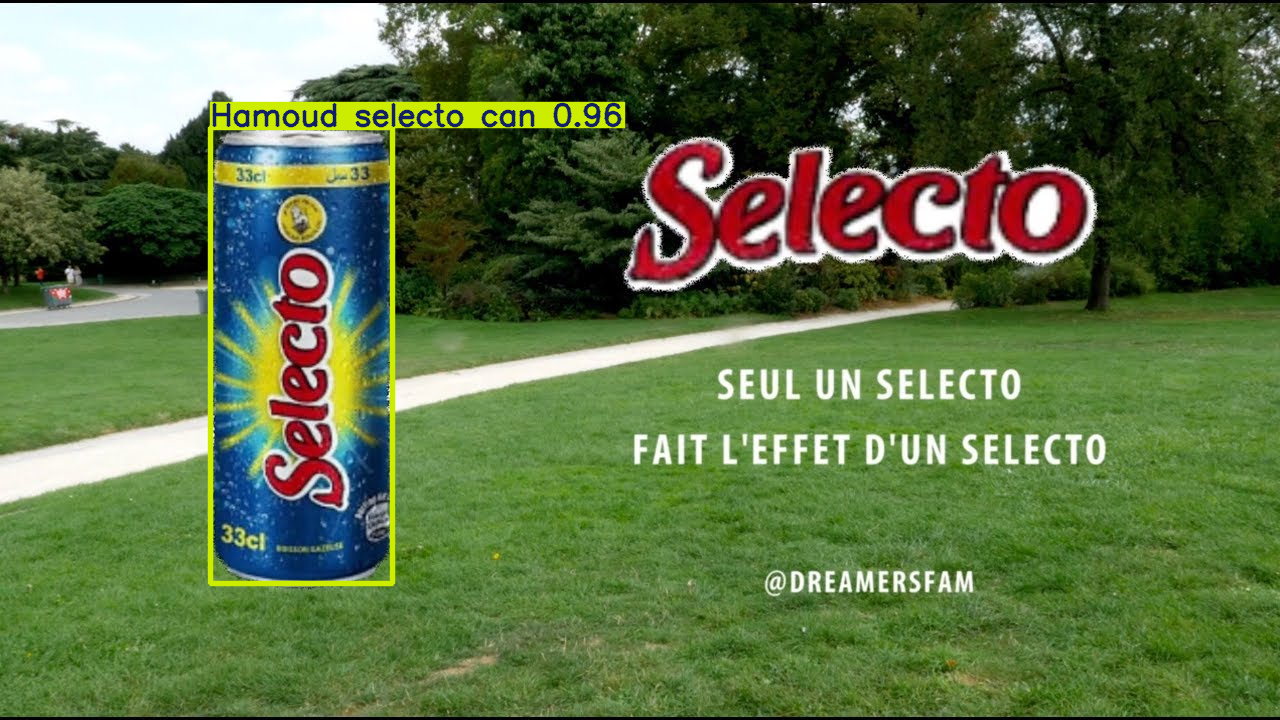

In [ ]:
from ultralytics import YOLO

model=YOLO("/content/runs/detect/product_detection_best/weights/best.pt")

results = model.predict("1.jpg", imgsz=640, conf=0.5)

# Display the results
results[0].show()

**Trying Fine-tuning**

In [ ]:
from ultralytics import YOLO

model = YOLO("best.pt")

# Train the model using refined parameters:
results = model.train(
    data="/content/Algerian-grocery-products-9/data.yaml",
    epochs=100,                   # Increase epochs for better convergence (adjust as needed)
    batch=16,                    # Adjust batch size based on your GPU memory (e.g. 8, 16, or 32)
    imgsz=640,                   # Standard image size; 640 often gives a good balance between speed and accuracy
    device=0,
    name="product_detection_best",  # Name of this training run
    project="runs/detect",       # Folder to save training results
    exist_ok=True,
    augment=True,
    resume=True,
    freeze=0,

)

# Optionally, view or print results
print(results)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=best.pt, data=/content/Algerian-grocery-products-9/data.yaml, epochs=9, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/detect, name=product_detection_best, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=best.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

train: Scanning /content/Algerian-grocery-products-9/train/labels.cache... 606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 606/606 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 348, len(boxes) = 765. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Algerian-grocery-products-9/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 16, len(boxes) = 59. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/product_detection_best/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


AssertionError: best.pt training to 9 epochs is finished, nothing to resume.
Start a new training without resuming, i.e. 'yolo train model=best.pt'